In [174]:
#
# Importa as bibliotecas que serão utilizadas nas análises
#
import pandas as pd
import xlrd
import matplotlib
import matplotlib.pyplot as plt
import openpyxl
import urllib
from   openpyxl import Workbook
#

In [175]:
def RecuperaValores(workbook, itemDesejado):
    """
    Essa função 'lê' a planilha criada (workbook) e busca os valores relativos aos item desejado
    """
    Dictionary_Mes_Numero_Nome = {1:'Jan', 2:'Fev', 3:'Mar',  4:'Abr',  5:'Mai',  6:'Jun',
                                  7:'Jul', 8:'Ago', 9:'Set', 10:'Out', 11:'Nov', 12:'Dez'}

    book_ws = workbook['R$ milhões']
    
    maximo_linhas   = book_ws.max_row
    maximo_colunas  = book_ws.max_column
    
    for i in range(maximo_linhas):
        
        item = book_ws.cell(row = i + 1, column = 1).value
        
        try:
            item = item.strip()
        except AttributeError:
            pass
                    
        if (item == itemDesejado):
            rowDados  = i + 1     
#
# Lendo os valores do item. Vai começar em janeiro de 2007.
#
    ano = 2007
    mes = 1
    lista_Dados  = []
    Data_Dados   = []
    
    for j in range(0,maximo_colunas-2):
        valor =  book_ws.cell(row = rowDados, column = 3 + j).value
        if (mes < 12 ):
            lista_Dados.append(valor/1000000)
            mes = mes + 1
            Data_Dados.append( Dictionary_Mes_Numero_Nome[mes] + "/" + str(ano) )
        else:
            lista_Dados.append(valor/1000000)
            mes = 1
            ano = ano + 1
            Data_Dados.append( Dictionary_Mes_Numero_Nome[mes] + "/" + str(ano) )
            
    return lista_Dados, Data_Dados

In [176]:
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6)

In [177]:
#
# Faz a leitura do arquivo Divggnp.xls, com o cálculo da Dívida Líquida do Setor Público no portal do Banco Central,
# com a metodologia utilizada pelo Bacen a partir de 2008.  
#   
workbook = Workbook()

link = 'https://www.bcb.gov.br/content/estatisticas/Documents/Tabelas_especiais/Divggnp.xls'

file_name, headers = urllib.request.urlretrieve(link)

wb = xlrd.open_workbook(file_name)

for k in range(0, wb.nsheets):
    xlsSheet=wb.sheet_by_index(k)
    sheet=workbook.active if k==0 else workbook.create_sheet()
    sheet.title=xlsSheet.name
    for row in range(0, xlsSheet.nrows):
        for col in range(0, xlsSheet.ncols):
            sheet.cell(row=row+1, column=col+1).value=xlsSheet.cell(row, col).value

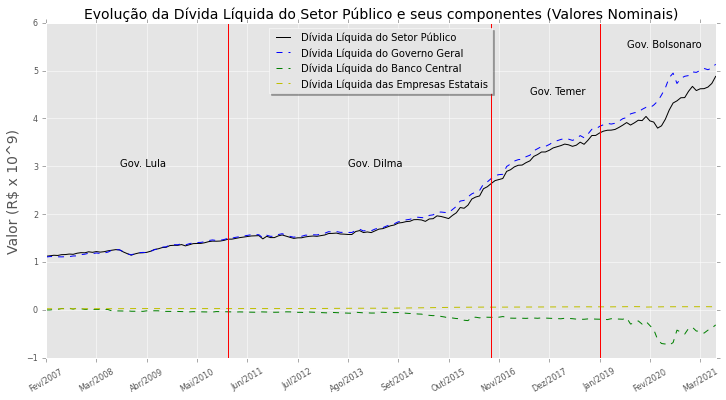

In [178]:
itemDesejado               = 'Dívida líquida do setor público (A= B+K+L)'
lista_Dados_DLSP, Data_Dados = RecuperaValores(workbook, itemDesejado)

itemDesejado               = 'Dívida líquida do governo geral(B=C+F+I+J)'
lista_Dados_DLGG, Data_Dados = RecuperaValores(workbook, itemDesejado)

itemDesejado               = 'Dívida líquida do Banco Central (K)'
lista_Dados_DLBC, Data_Dados = RecuperaValores(workbook, itemDesejado)

itemDesejado               = 'Dívida líquida das empresas estatais11/ (L)'
lista_Dados_DLEE, Data_Dados = RecuperaValores(workbook, itemDesejado)

figura = plt.figure()
x_ticks = np.arange(0, 175, 13)
plt.xticks(x_ticks)
plt.plot(Data_Dados, lista_Dados_DLSP, 'k',   label = "Dívida Líquida do Setor Público")
plt.plot(Data_Dados, lista_Dados_DLGG, 'b--', label = "Dívida Líquida do Governo Geral")
plt.plot(Data_Dados, lista_Dados_DLBC, 'g--', label = "Dívida Líquida do Banco Central")
plt.plot(Data_Dados, lista_Dados_DLEE, 'y--', label = "Dívida Líquida das Empresas Estatais")
plt.title('Evolução da Dívida Líquida do Setor Público e seus componentes (Valores Nominais)', fontsize = 14)
plt.legend(framealpha=1, frameon=True, loc='upper center', shadow=True, fontsize='medium')
legend.get_frame().set_facecolor('C0')
plt.ylabel("Valor (R$ x 10^9)", fontsize = 14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8, rotation=30)

xcoords = ['Jan/2011', 'Set/2016', 'Jan/2019']
for xc in xcoords:
    plt.axvline(x=xc, color = "red")
    
plt.text('Set/2008', 3, "Gov. Lula")
plt.text('Ago/2013', 3, "Gov. Dilma")
plt.text('Jul/2017', 4.5, "Gov. Temer")
plt.text('Ago/2019', 5.5, "Gov. Bolsonaro")

plt.show()
figura.savefig("DLSP.pdf")

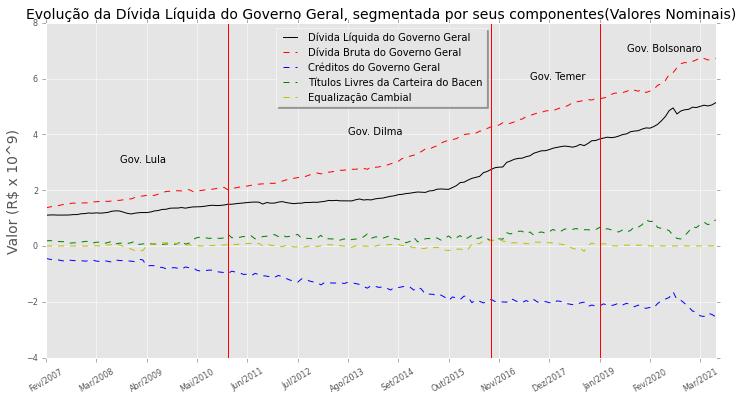

In [170]:
itemDesejado                = 'Dívida líquida do governo geral(B=C+F+I+J)'
lista_Dados_DLGG, Data_Dados   = RecuperaValores(workbook, itemDesejado)

itemDesejado                 = 'Dívida bruta do governo geral2/(C=D+E)'
lista_Dados_DBGG, Data_Dados   = RecuperaValores(workbook, itemDesejado)

itemDesejado                = 'Créditos do governo geral (F=G+H)'
lista_Dados_CGG, Data_Dados   = RecuperaValores(workbook, itemDesejado)

itemDesejado                 = 'Títulos livres na carteira do Bacen9/ (I)'
lista_Dados_DLBC, Data_Dados   = RecuperaValores(workbook, itemDesejado)

itemDesejado                 = 'Equalização Cambial10/ (J)'
lista_Dados_DLEE, Data_Dados   = RecuperaValores(workbook, itemDesejado)

figura = plt.figure()
x_ticks = np.arange(0, 175, 13)
plt.xticks(x_ticks)
plt.plot(Data_Dados, lista_Dados_DLGG,    'k',   label = "Dívida Líquida do Governo Geral")
plt.plot(Data_Dados, lista_Dados_DBGG,    'r--', label = "Dívida Bruta do Governo Geral")
plt.plot(Data_Dados, lista_Dados_CGG,     'b--',  label = "Créditos do Governo Geral")
plt.plot(Data_Dados, lista_Dados_DLBC,    'g--',   label = "Títulos Livres da Carteira do Bacen")
plt.plot(Data_Dados, lista_Dados_DLEE,    'y--',   label = "Equalização Cambial")
plt.title('Evolução da Dívida Líquida do Governo Geral, segmentada por seus componentes(Valores Nominais)', fontsize = 14)
plt.ylabel("Valor (R$ x 10^9)", fontsize = 14)
plt.legend(framealpha=1, frameon=True, loc='upper center', shadow=True, fontsize='medium')
legend.get_frame().set_facecolor('C0')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8, rotation=30)

xcoords = ['Jan/2011', 'Set/2016', 'Jan/2019']
for xc in xcoords:
    plt.axvline(x=xc, color = "red")
    
plt.text('Set/2008', 3, "Gov. Lula")
plt.text('Ago/2013', 4, "Gov. Dilma")
plt.text('Jul/2017', 6, "Gov. Temer")
plt.text('Ago/2019', 7, "Gov. Bolsonaro")

plt.show()
figura.savefig("DLGG.pdf")

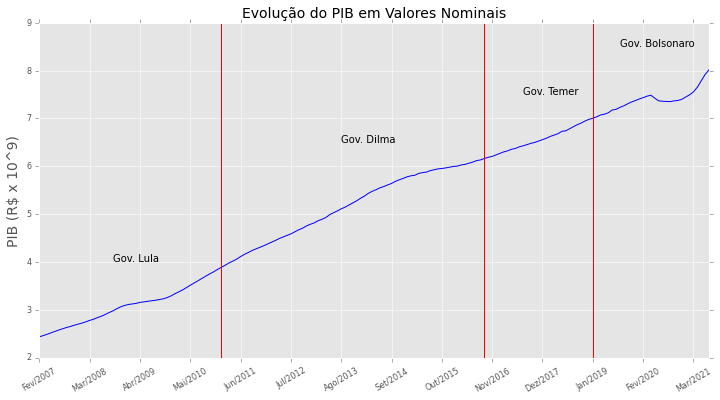

In [156]:
itemDesejado              = 'PIB12/'
lista_Dados_PIB, Data_Dados = RecuperaValores(workbook, itemDesejado)

x_ticks = np.arange(0, 175, 13)
plt.xticks(x_ticks)
plt.plot(Data_Dados, lista_Dados_PIB, color = 'blue')
plt.title('Evolução do PIB em Valores Nominais', fontsize = 14)
plt.ylabel("PIB (R$ x 10^9)", fontsize = 14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8, rotation=30)

xcoords = ['Jan/2011', 'Set/2016', 'Jan/2019']
for xc in xcoords:
    plt.axvline(x=xc, color = "red")
    
plt.text('Set/2008', 4, "Gov. Lula")
plt.text('Ago/2013', 6.5, "Gov. Dilma")
plt.text('Jul/2017', 7.5, "Gov. Temer")
plt.text('Ago/2019', 8.5, "Gov. Bolsonaro")
plt.show()

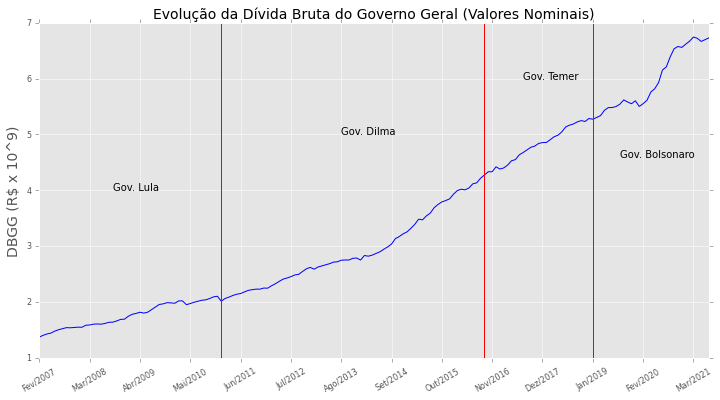

In [171]:
itemDesejado               = 'Dívida bruta do governo geral2/(C=D+E)'
lista_Dados_DBGG, Data_Dados = RecuperaValores(workbook, itemDesejado)

x_ticks = np.arange(0, 175, 13)
plt.xticks(x_ticks)
plt.plot(Data_Dados, lista_Dados_DBGG, color = 'blue')
plt.title('Evolução da Dívida Bruta do Governo Geral (Valores Nominais)', fontsize = 14)
plt.ylabel("DBGG (R$ x 10^9)", fontsize = 14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8, rotation=30)

xcoords = ['Jan/2011', 'Set/2016', 'Jan/2019']
for xc in xcoords:
    plt.axvline(x=xc, color = "red")
    
plt.text('Set/2008', 4,   "Gov. Lula")
plt.text('Ago/2013', 5,   "Gov. Dilma")
plt.text('Jul/2017', 6,   "Gov. Temer")
plt.text('Ago/2019', 4.6, "Gov. Bolsonaro")
plt.show()

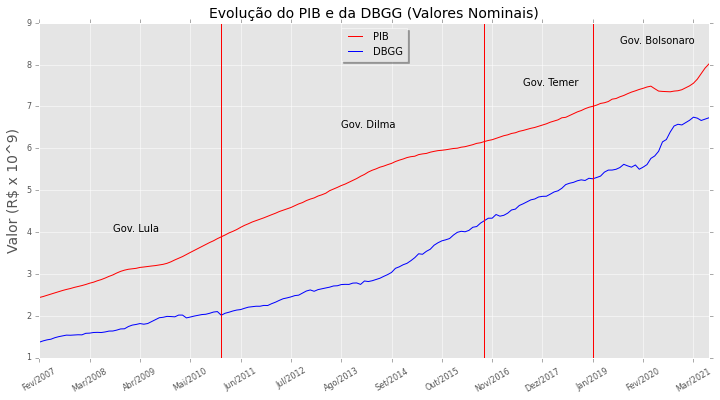

In [172]:
x_ticks = np.arange(0, 175, 13)
plt.xticks(x_ticks)
plt.plot(Data_Dados, lista_Dados_PIB,  'r', label = "PIB")
plt.plot(Data_Dados, lista_Dados_DBGG, 'b', label = "DBGG")
plt.title('Evolução do PIB e da DBGG (Valores Nominais)', fontsize = 14)
plt.ylabel("Valor (R$ x 10^9)", fontsize = 14)
plt.legend(framealpha=1, frameon=True, loc='upper center', shadow=True, fontsize='medium')
legend.get_frame().set_facecolor('C0')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8, rotation=30)

xcoords = ['Jan/2011', 'Set/2016', 'Jan/2019']
for xc in xcoords:
    plt.axvline(x=xc, color = "red")
    
plt.text('Set/2008',   4,   "Gov. Lula")
plt.text('Ago/2013', 6.5,   "Gov. Dilma")
plt.text('Jul/2017', 7.5,   "Gov. Temer")
plt.text('Ago/2019', 8.5, "Gov. Bolsonaro")
plt.show()

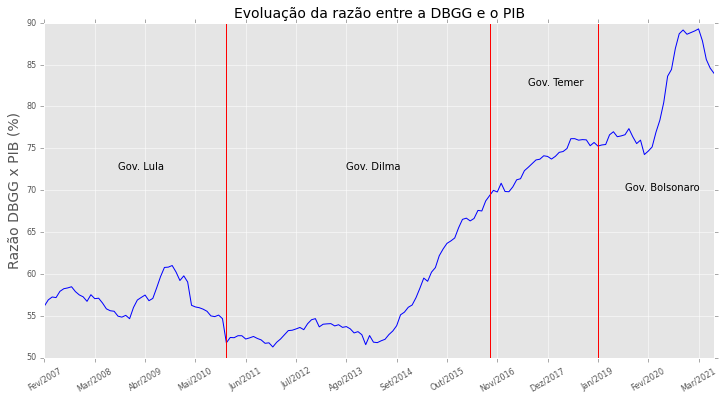

In [163]:
Razao_DBGG_PIB = [(m/n)*100 for m, n in zip(lista_Dados_DBGG, lista_Dados_PIB)]

x_ticks = np.arange(0, 175, 13)
plt.xticks(x_ticks)
plt.plot(Data_Dados, Razao_DBGG_PIB, color='blue')
plt.title('Evoluação da razão entre a DBGG e o PIB', fontsize = 14)
plt.ylabel("Razão DBGG x PIB (%)", fontsize = 14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8, rotation=30)

xcoords = ['Jan/2011', 'Set/2016', 'Jan/2019']
for xc in xcoords:
    plt.axvline(x=xc, color = "red")
    
plt.text('Set/2008', 72.5,   "Gov. Lula")
plt.text('Ago/2013', 72.5,   "Gov. Dilma")
plt.text('Jul/2017', 82.5,   "Gov. Temer")
plt.text('Ago/2019', 70.0, "Gov. Bolsonaro")
plt.show()

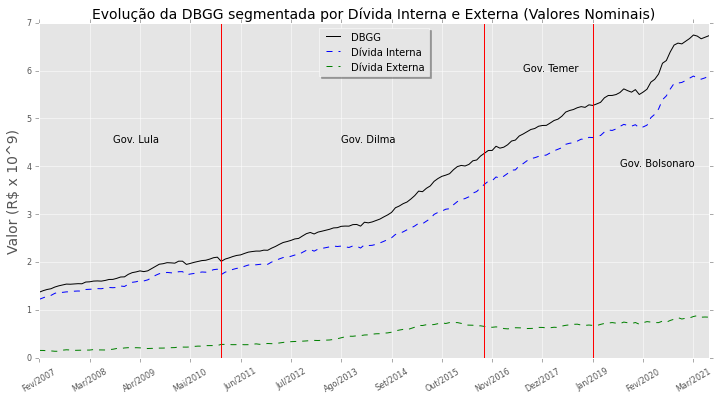

In [173]:
itemDesejado               = 'Dívida interna (D)'
lista_Dados_DI, Data_Dados   = RecuperaValores(workbook, itemDesejado)

itemDesejado               = 'Dívida externa (E)'
lista_Dados_DE, Data_Dados   = RecuperaValores(workbook, itemDesejado)

figura = plt.figure()
x_ticks = np.arange(0, 175, 13)
plt.xticks(x_ticks)
plt.plot(Data_Dados, lista_Dados_DBGG,  'k', label = "DBGG")
plt.plot(Data_Dados, lista_Dados_DI,    'b--',  label = "Dívida Interna")
plt.plot(Data_Dados, lista_Dados_DE,    'g--',   label = "Dívida Externa")
plt.title('Evolução da DBGG segmentada por Dívida Interna e Externa (Valores Nominais)', fontsize = 14)
plt.ylabel("Valor (R$ x 10^9)", fontsize = 14)
plt.legend(framealpha=1, frameon=True, loc='upper center', shadow=True, fontsize='medium')
legend.get_frame().set_facecolor('C0')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8, rotation=30)

xcoords = ['Jan/2011', 'Set/2016', 'Jan/2019']
for xc in xcoords:
    plt.axvline(x=xc, color = "red")
    
plt.text('Set/2008', 4.5,   "Gov. Lula")
plt.text('Ago/2013', 4.5,   "Gov. Dilma")
plt.text('Jul/2017', 6.0,   "Gov. Temer")
plt.text('Ago/2019', 4.0, "Gov. Bolsonaro")

plt.show()
figura.savefig("DBGG_DI_DE.pdf")